In [1]:
import pandas as pd 
import numpy as np

berikut ini adalah implementasi DBSCAN dengan dataset non-linear make_moons dari sklearn. Karena DBSCAN membentuk cluster data berdasarkan density atau kepadatan, sehingga sangat bagus untuk data-data non-linear. Dengan DBSCAN cluster data tidak hanya akan berbentuk lingkaran, namun bisa dalam bentuk-bentuk non-linear lainnya.

In [2]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

berikut ini dibuatkan data berbentuk non-linear atau bentuk bulan sabit dari sklearn

In [3]:
X, _ = make_moons(n_samples=300, noise=0.1, random_state=42)

In [19]:
X.shape

(200, 2)

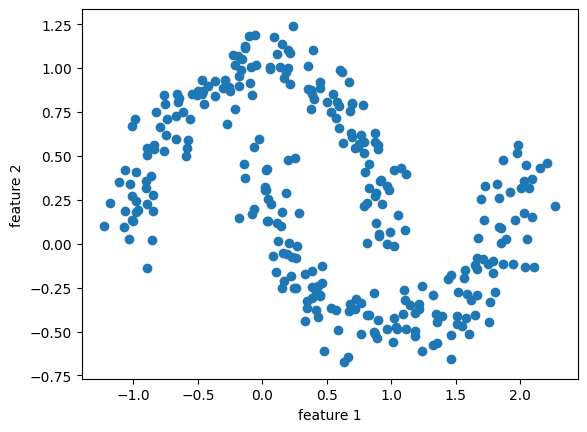

In [4]:
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.show()

kita coba untuk mengelompokkan data atau membuat cluster dengan algoritma DBSCAN. Mengelompokkan data berdasarkan density-nya.

In [5]:
dbscan = DBSCAN(eps=0.2, min_samples=5)
clusters = dbscan.fit_predict(X)

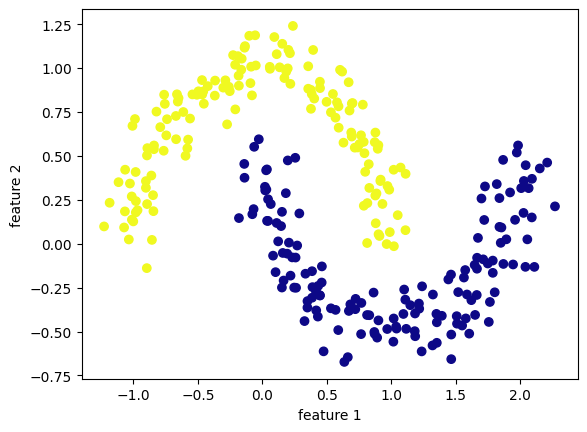

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap="plasma")
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.show()

karena saya tertarik juga bagaimana kalau k-means digunakan untuk meng-clustering data ini. Maka mari kita coba gunakan kmeans untuk data ini

In [15]:
from sklearn.cluster import KMeans

In [22]:
models = KMeans(n_clusters=2)

In [23]:
k_means_cluster = models.fit_predict(X)

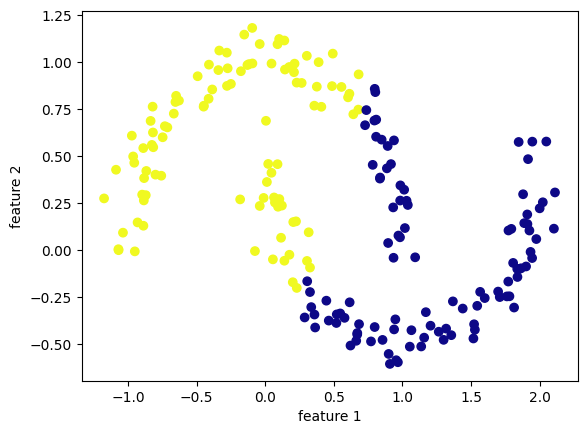

In [24]:
plt.scatter(X[:, 0], X[:, 1], c=k_means_cluster, cmap="plasma")
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.show()

wahh ini menarik nih, jadi intuisi-nya dengan k-means data data akan dipadatkan ke titik centroidnya. Jadi setiap titik ada akan diukur jarakanya ke titik centroid data yang didefinisikan secara random

Sementara dengan menggunakan DBSCAN semua titik data akan dihitung jaraknya ke titik data disekitarnya. Jika masih dalam ukuran epsilon maka akan dijadikan satu cluster selama memenuhi nilai minimum sample-nya. 

Bagaimana kalau menangani nilai outliers antara dbscan dan k-means ??

In [25]:
# data outliers yang akan digabungkan dengan data diatas
outliers = np.array([
    [1.5, 1.5],   
    [-1.5, 1.5],  
    [0.5, -1.0],  
    [0.6, -1.05]  
])

In [26]:
X = np.vstack([X, outliers])

In [33]:
X.shape

(204, 2)

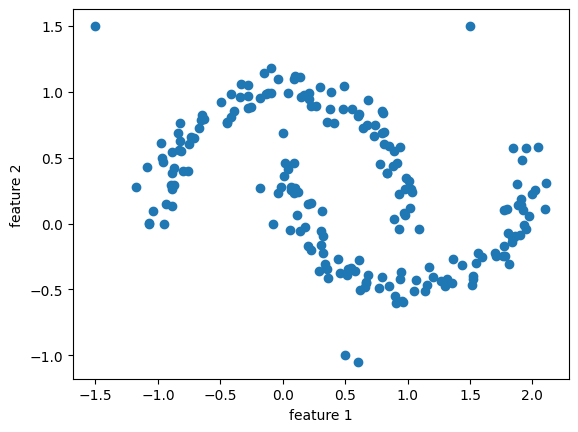

In [28]:
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.show()

Menggunakan DBSCAN untuk clustering data

In [29]:
dbscan = DBSCAN(eps=0.2, min_samples=5)
clusters = dbscan.fit_predict(X)

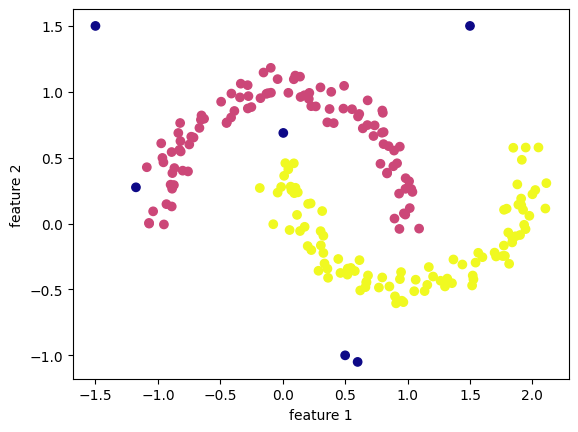

In [34]:
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap="plasma")
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.show()

menggunakan algoritma k-means

In [36]:
clusters_By_Kmeans = models.fit_predict(X)

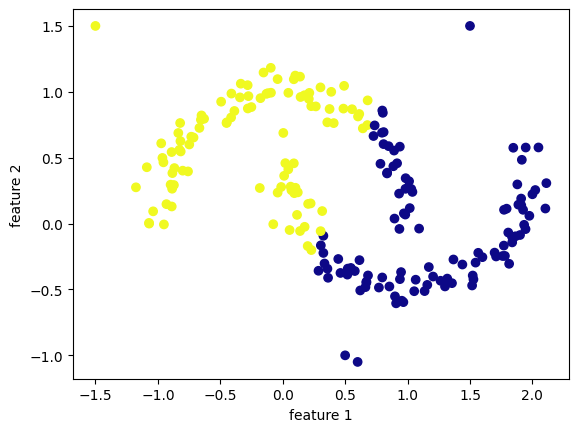

In [38]:
plt.scatter(X[:, 0], X[:, 1], c=clusters_By_Kmeans, cmap="plasma")
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.show()